In [1]:
import cv2
import matplotlib.pyplot as plt

from YOLO_utils import *
from darknet import Darknet

In [2]:
#YOLO config file
cfg_file = './cfg/tiny-yolo.cfg'

# Pre-trained weights file
weight_file = './weights/yolov3-tiny.weights'

# COCO object classes file
namesfile = 'data/coco.names'

# YOLO Network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

unknown type yolo
unknown type upsample
unknown type yolo


RuntimeError: The expanded size of the tensor (3) must match the existing size (432) at non-singleton dimension 3.  Target sizes: [16, 3, 3, 3].  Tensor sizes: [432]

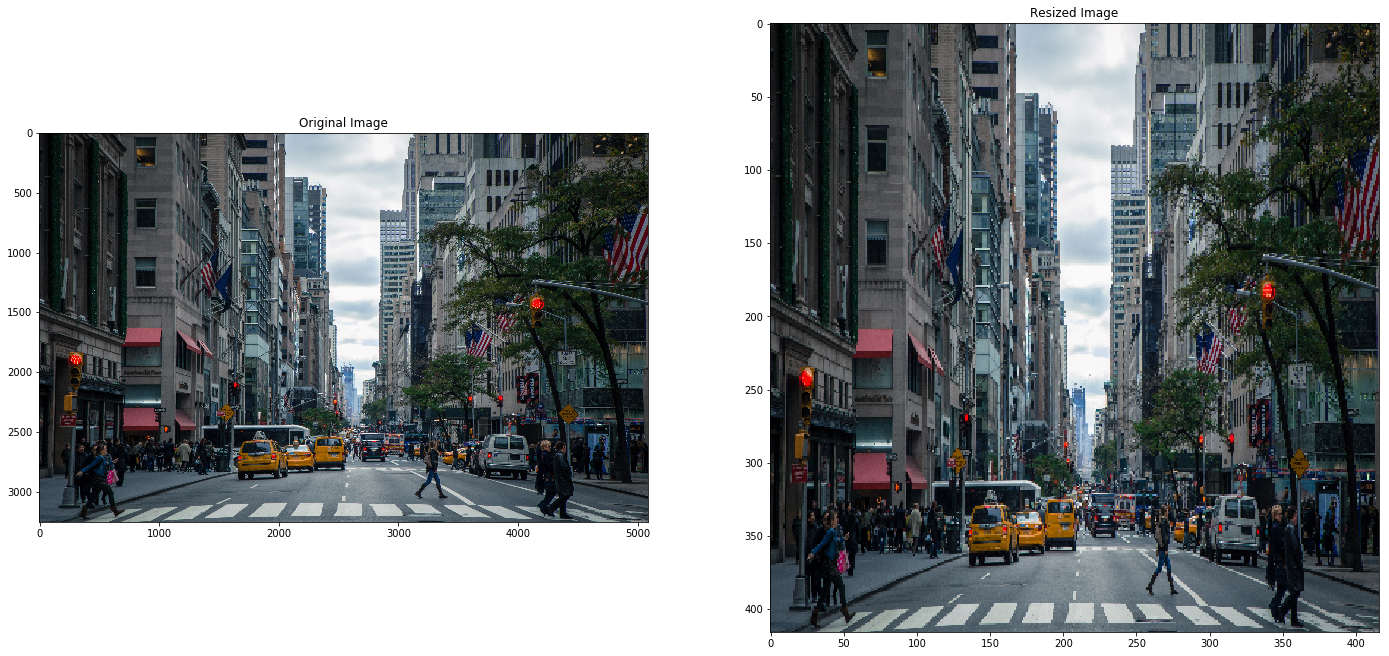

In [5]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

img = cv2.imread('./img/city.jpg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

YOLO uses Non-Maximal Suppression (NMS) to only keep the best bounding box

In [6]:
# Set the NMS threshold
nms_thresh = 0.6

Select the bounding boxes with the highest detection probability and eliminate all the bounding boxes whose Intersection Over Union (IOU) value is higher than a given IOU threshold. In the code below, we set this IOU threshold to 0.4. This means that all predicted bounding boxes that have an IOU value greater than 0.4 with respect to the best bounding boxes will be removed.

In [7]:
# Set the IOU threshold
iou_thresh = 0.4



It took 0.893 seconds to detect the objects in the image.

Number of Objects Detected: 28 

Objects Found and Confidence Level:

1. person: 0.999996
2. person: 1.000000
3. truck: 0.949642
4. car: 0.634397
5. car: 0.627128
6. truck: 0.671306
7. traffic light: 1.000000
8. person: 1.000000
9. person: 1.000000
10. car: 0.997258
11. bus: 0.997870
12. person: 1.000000
13. person: 1.000000
14. person: 0.999999
15. person: 1.000000
16. person: 1.000000
17. traffic light: 1.000000
18. traffic light: 1.000000
19. handbag: 0.997166
20. traffic light: 1.000000
21. car: 0.989488
22. traffic light: 1.000000
23. person: 0.999999
24. traffic light: 0.999999
25. traffic light: 1.000000
26. truck: 0.705300
27. person: 0.999993
28. person: 0.999996


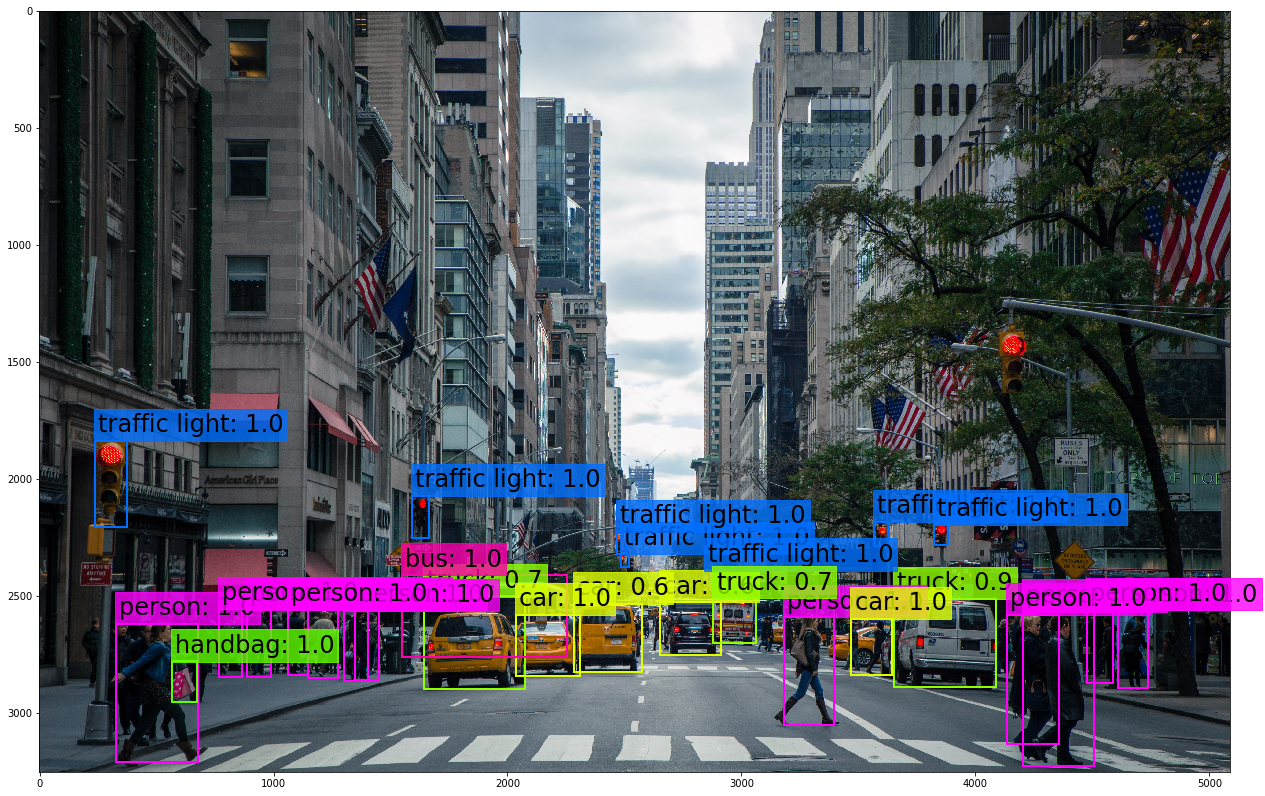

In [8]:
# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)



It took 0.568 seconds to detect the objects in the image.

Number of Objects Detected: 6 

Objects Found and Confidence Level:

1. train: 0.999996
2. person: 1.000000
3. person: 1.000000
4. person: 0.999999
5. person: 0.999917
6. person: 0.999998


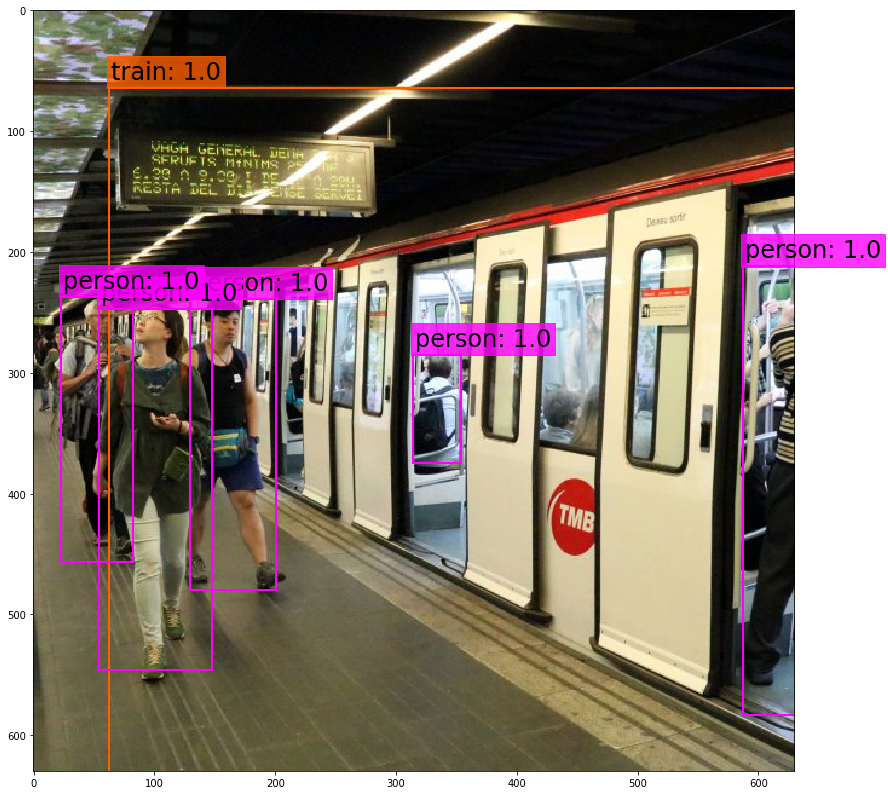

In [9]:
img = cv2.imread('./img/metro.jpeg')
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))


# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)